<a href="https://colab.research.google.com/github/BenUCL/AI4Reefs-Workshop/blob/main/Nueral_Networks_%26_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

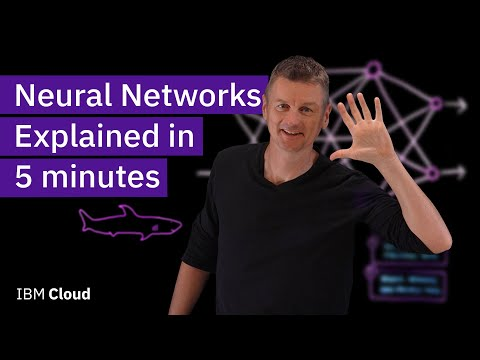

In [13]:
#@title Watch this if you haven't already!
from IPython.display import YouTubeVideo

# YouTube video ID
video_id = "jmmW0F0biz0"

# Display the YouTube video in the notebook
YouTubeVideo(video_id)

In [1]:
# Mount Drive
from google.colab import drive
drive.mount('/content/drive')

# Path to the unprocessed images
image_dir = '/content/drive/MyDrive/RCUK_AI_Workshop/mars_hackathon_filtered/mars_hackathon'

# Path to our preprocessed image data
base_dir = '/content/drive/MyDrive/RCUK_AI_Workshop/mars_hackathon_filtered/mars_hackathon_preprocessed'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


- Getting to know your data is key. go look in these folders and view images. do you think this task is achievable?
- these images are high res. to pass images into the network we must resize these. this has been done for you to save time. use this folder as the source of your data:

use this code:

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import random


num_epochs = 20

# Set the seed for numpy, random, and TensorFlow at the beginning of your script
np.random.seed(0)
random.seed(0)
tf.random.set_seed(0)


def create_dataframe(folder_path, label):
    filepaths = []
    labels = []
    for root, _, files in os.walk(folder_path):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg')):
                filepaths.append(os.path.join(root, file))
                labels.append(label)
    return pd.DataFrame({'filepath': filepaths, 'label': labels})

# Paths to the main class directories
healthy_dir = os.path.join(base_dir, 'healthy')
degraded_dir = os.path.join(base_dir, 'degraded')

# Create dataframes
df_healthy = create_dataframe(healthy_dir, 'healthy')
df_degraded = create_dataframe(degraded_dir, 'degraded')

# Combine dataframes
df = pd.concat([df_healthy, df_degraded], ignore_index=True)

# Splitting the dataframe into training and validation sets
train_df, val_df = train_test_split(df, test_size=0.2, random_state=0, stratify=df['label'])

# Data generators
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='filepath',
    y_col='label',
    target_size=(224, 224),  # Assuming you're still working with MobileNetV2
    class_mode='binary',
    batch_size=32)

validation_generator = val_datagen.flow_from_dataframe(
    dataframe=val_df,
    x_col='filepath',
    y_col='label',
    target_size=(224, 224),
    class_mode='binary',
    batch_size=32)

# Now you can use train_generator and validation_generator for training your model
# Load a pre-trained model
base_model = MobileNetV2(weights='imagenet', include_top=False)
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the base_model for transfer learning
for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_generator, epochs=num_epochs, validation_data=validation_generator)

Found 349 validated image filenames belonging to 2 classes.
Found 88 validated image filenames belonging to 2 classes.


Epoch 1/20
11/11 [==============================] - 27s 350ms/step - loss: 0.4629 - accuracy: 0.8052 - val_loss: 5.8160 - val_accuracy: 0.4659
Epoch 2/20
11/11 [==============================] - 2s 171ms/step - loss: 0.1263 - accuracy: 0.9599 - val_loss: 7.5596 - val_accuracy: 0.4886
Epoch 3/20
11/11 [==============================] - 2s 207ms/step - loss: 0.0835 - accuracy: 0.9742 - val_loss: 3.6865 - val_accuracy: 0.5909
Epoch 4/20
11/11 [==============================] - 2s 176ms/step - loss: 0.0583 - accuracy: 0.9914 - val_loss: 8.5917 - val_accuracy: 0.5114
Epoch 5/20
11/11 [==============================] - 2s 191ms/step - loss: 0.0553 - accuracy: 0.9828 - val_loss: 12.0084 - val_accuracy: 0.4205
Epoch 6/20
11/11 [==============================] - 2s 199ms/step - loss: 0.0054 - accuracy: 1.0000 - val_loss: 12.3158 - val_accuracy: 0.4205
Epoch 7/20
11/11 [==============================] - 3s 233ms/step - loss: 0.0060 - accuracy: 0.9971 - val_loss: 8.7339 - val_accuracy: 0.4545
Epo

- what do you notice about the relationship between the train acc and the val acc. what is causing this? (train is higher, likely overfitting)
- what value is the acc of our model? if wanted a final, publishable acc what would we also need to do?
- try increasing or decreasing the num epochs. what does this do to the accs and their relationship?
- which small part can we change to train the full network, so we're not transfer learning
- which is better? why could this be? (even more overfitting on train set)
- of everything you've tried. what should we do to get the best version of our model. now do it!
- we now have data from restored sites. lets inference on this and see how many images are restored!

add restored inference
